In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlrd

In [2]:
xls =  pd.ExcelFile('Student_Data (2).xlsx')
data = pd.read_excel(xls,'xAPI-Edu-Data')
data.head()
# data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,ParentschoolSatisfaction2,StudentAbsenceDays,StudentAbsenceDays2,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,1,Under-7,1,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,1,Under-7,1,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,0,Above-7,0,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,0,Above-7,0,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,0,Above-7,0,M


In [3]:
data.shape

(480, 19)

In [4]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction2,StudentAbsenceDays2
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,0.608333,0.600000
std,30.779223,33.080007,26.611244,27.637735,0.488632,0.490409
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000
50%,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000
75%,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000
max,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
gender                       480 non-null object
NationalITy                  480 non-null object
PlaceofBirth                 480 non-null object
StageID                      480 non-null object
GradeID                      480 non-null object
SectionID                    480 non-null object
Topic                        480 non-null object
Semester                     480 non-null object
Relation                     480 non-null object
raisedhands                  480 non-null int64
VisITedResources             480 non-null int64
AnnouncementsView            480 non-null int64
Discussion                   480 non-null int64
ParentAnsweringSurvey        480 non-null object
ParentschoolSatisfaction     480 non-null object
ParentschoolSatisfaction2    480 non-null int64
StudentAbsenceDays           479 non-null object
StudentAbsenceDays2          480 non-null int64
Class              

# Calculate the student count gender wise

In [6]:
gender =  data['gender'].value_counts()
gender

M    305
F    175
Name: gender, dtype: int64

In [7]:
cal_gen = pd.DataFrame(gender)
calculate_gen = cal_gen.reset_index()
calculate_gen

,index,gender
0,M,305
1,F,175


In [8]:
calculate_gen.columns = ['gender','frequency']

In [9]:
calculate_gen

,gender,frequency
0,M,305
1,F,175


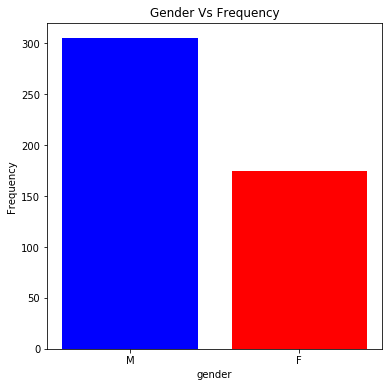

In [45]:
plt.figure(figsize = (6,6))
plt.bar(calculate_gen['gender'],calculate_gen['frequency'],color=['b','r'])
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Gender Vs Frequency')
plt.show()

# Calculate the student count location wise

In [11]:
count = data['NationalITy'].value_counts()
count

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [12]:
count_data = pd.DataFrame(count)
count_data

,NationalITy
KW,179
Jordan,172
Palestine,28
Iraq,22
lebanon,17
Tunis,12
SaudiArabia,11
Egypt,9
Syria,7
Lybia,6


In [13]:
count_data1 = count_data.reset_index()
count_data1

,index,NationalITy
0,KW,179
1,Jordan,172
2,Palestine,28
3,Iraq,22
4,lebanon,17
5,Tunis,12
6,SaudiArabia,11
7,Egypt,9
8,Syria,7
9,Lybia,6


In [14]:
count_data1.columns = ['NationalITy','No_of_student']
count_data1

,NationalITy,No_of_student
0,KW,179
1,Jordan,172
2,Palestine,28
3,Iraq,22
4,lebanon,17
5,Tunis,12
6,SaudiArabia,11
7,Egypt,9
8,Syria,7
9,Lybia,6


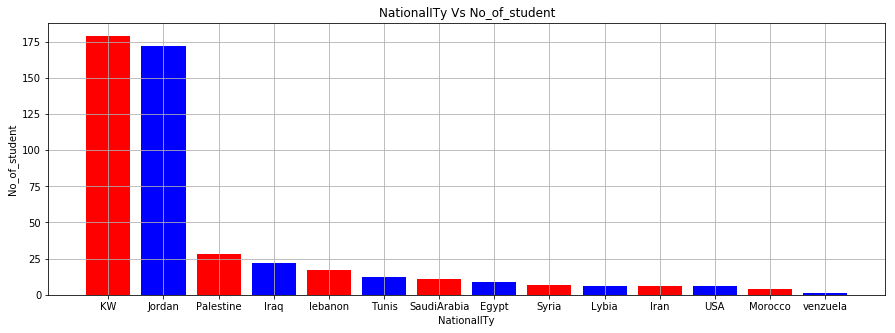

In [15]:
plt.figure(figsize = (15,5))
plt.bar(count_data1['NationalITy'],count_data1['No_of_student'],color=['r','b'])
plt.xlabel('NationalITy')
plt.ylabel('No_of_student')
plt.title('NationalITy Vs No_of_student')
plt.grid()

# Calculate the count of student gender wise at every state

In [16]:
g = data.groupby(['gender','NationalITy','PlaceofBirth']).size()
g

gender  NationalITy  PlaceofBirth
F       Egypt        Egypt             2
        Iran         Iran              1
        Iraq         Iraq              6
        Jordan       Egypt             1
                     Jordan           71
                     KuwaIT            1
                     Palestine         2
                     USA               1
                     lebanon           3
        KW           KuwaIT           52
                     USA               2
        Lybia        Lybia             2
        Morocco      Morocco           1
        Palestine    Jordan            6
                     Palestine         2
        SaudiArabia  SaudiArabia       3
                     USA               1
        Syria        Syria             2
        Tunis        USA               1
        USA          USA               4
        lebanon      lebanon          11
M       Egypt        Egypt             6
                     KuwaIT            1
        Iran         Ir

In [17]:
count_state = pd.DataFrame(g)
count_state.head()

0
gender NationalITy PlaceofBirth    
F      Egypt       Egypt          2
       Iran        Iran           1
       Iraq        Iraq           6
       Jordan      Egypt          1
                   Jordan        71

In [18]:
count_state1 = count_state.reset_index()

In [19]:
count_state1.columns = ['gender','NationalITy','PlaceofBirth','No_of_student']

In [20]:
count_state1.head()

,gender,NationalITy,PlaceofBirth,No_of_student
0,F,Egypt,Egypt,2
1,F,Iran,Iran,1
2,F,Iraq,Iraq,6
3,F,Jordan,Egypt,1
4,F,Jordan,Jordan,71


In [21]:
count_state1['gender'].value_counts()

M    24
F    21
Name: gender, dtype: int64

In [22]:
m = count_state1[count_state1 == 'M']
male = []
for i in count_state1.gender:
    male.append(i)
male
f = count_state1[count_state1 == 'F']
female = []
for k in count_state1.gender:
    female.append(k)

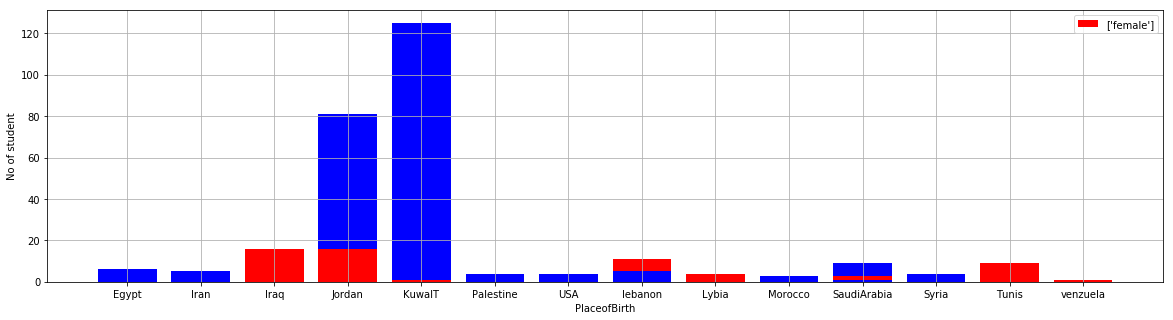

In [23]:
plt.figure(figsize = (20,5))
plt.bar(count_state1['PlaceofBirth'],count_state1['No_of_student'],color=['red','blue'],label=['female'])
plt.xlabel('PlaceofBirth')
plt.ylabel('No of student')
plt.legend(loc = 'best')
plt.grid()

# Calculate the student raised hand in the class vs student absent

In [24]:
student_absence = data.groupby(['raisedhands','StudentAbsenceDays']).size()
student_absence.head()

raisedhands  StudentAbsenceDays
0            Above-7               8
             Under-7               1
1            Above-7               2
2            Above-7               6
             Under-7               2
dtype: int64

In [25]:
student_absence1 = pd.DataFrame(student_absence)
sa = student_absence1.reset_index()
sa.columns = ['raisedhands','StudentAbsenceDays','no_of_student']
sa.head()

,raisedhands,StudentAbsenceDays,no_of_student
0,0,Above-7,8
1,0,Under-7,1
2,1,Above-7,2
3,2,Above-7,6
4,2,Under-7,2


In [26]:
s = sa.StudentAbsenceDays.value_counts()
s

Under-7    71
Above-7    61
Name: StudentAbsenceDays, dtype: int64

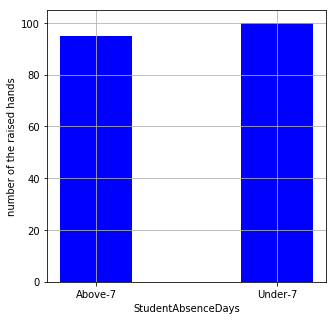

In [27]:
plt.figure(figsize = (5,5))
plt.bar(sa.StudentAbsenceDays,sa.raisedhands,width=0.4,color=['r','b'])
# plt.bar(sa.StudentAbsenceDays,sa.no_of_student)
plt.xlabel('StudentAbsenceDays')
plt.ylabel('number of the raised hands')
plt.grid()

# Topic Taken by students by location

In [28]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,ParentschoolSatisfaction2,StudentAbsenceDays,StudentAbsenceDays2,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,1,Under-7,1,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,1,Under-7,1,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,0,Above-7,0,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,0,Above-7,0,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,0,Above-7,0,M


In [29]:
topic = data['Topic'].value_counts()
topic

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [30]:
topic_data = pd.DataFrame(topic)

In [31]:
td = topic_data.reset_index()
td.columns = ['Topic','No_of_student']
td

,Topic,No_of_student
0,IT,95
1,French,65
2,Arabic,59
3,Science,51
4,English,45
5,Biology,30
6,Spanish,25
7,Chemistry,24
8,Geology,24
9,Quran,22


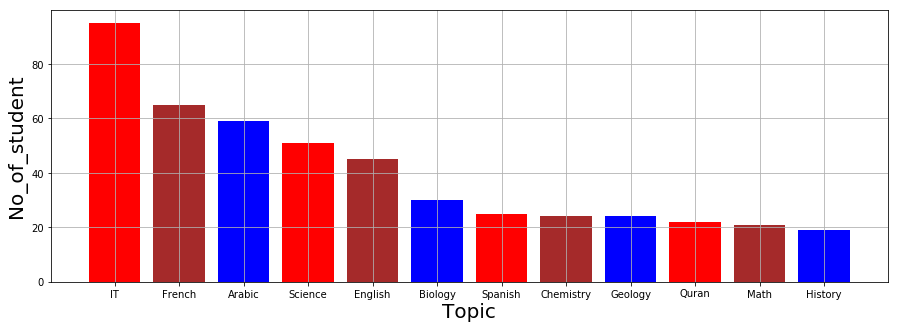

In [32]:
plt.figure(figsize = (15,5))
plt.bar(td.Topic,td.No_of_student,color=['red','brown','blue'])
plt.xlabel('Topic',fontsize=20)
plt.ylabel('No_of_student',fontsize=20)
plt.grid()
plt.show()

In [33]:
topic_loc = data.groupby(['PlaceofBirth','Topic']).size()
topic_location = pd.DataFrame(topic_loc)
tl = topic_location.reset_index()
tl.columns = ['PlaceofBirth','Topic','No_of_Student']
tl.head()

,PlaceofBirth,Topic,No_of_Student
0,Egypt,English,1
1,Egypt,French,2
2,Egypt,IT,1
3,Egypt,Math,1
4,Egypt,Quran,2


In [34]:
tl.No_of_Student.sum()

480

In [35]:
loc = tl['PlaceofBirth'].value_counts()
loc1 = pd.DataFrame(loc)
loc2 = loc1.reset_index()
loc2.columns = ['PlaceofBirth','frequency']
loc2

,PlaceofBirth,frequency
0,Jordan,11
1,KuwaIT,9
2,lebanon,8
3,SaudiArabia,8
4,Iraq,8
5,USA,7
6,Egypt,6
7,Palestine,4
8,Tunis,4
9,Syria,3


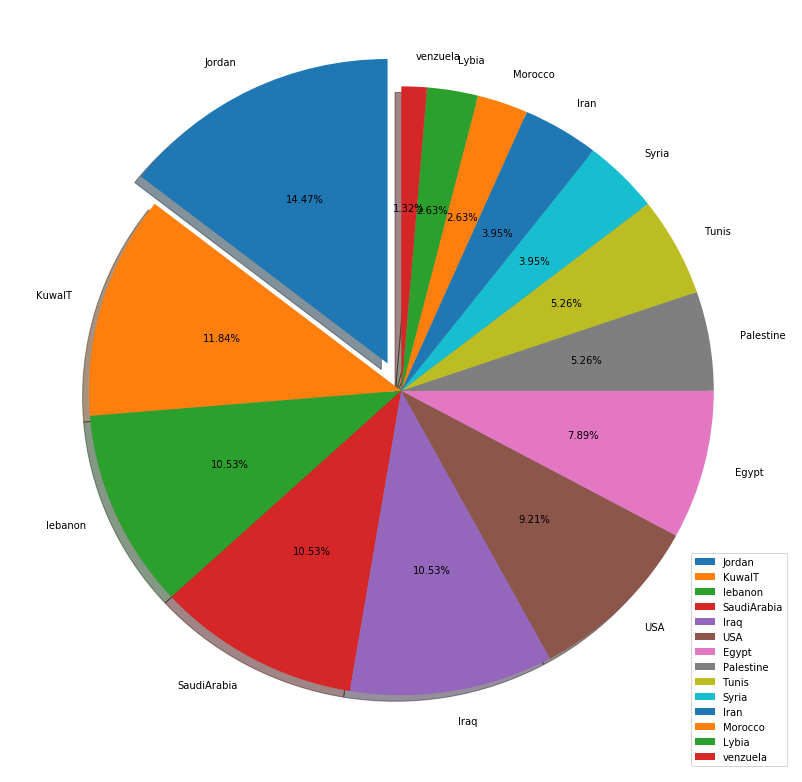

In [36]:
plt.figure(figsize = (14,14))
plt.pie(loc2['frequency'],labels=loc2['PlaceofBirth'],autopct='%1.2f%%',startangle=90,shadow=True,explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.legend(loc = 'best')

# Parents Satisfiction Vs Student Absense

In [37]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,ParentschoolSatisfaction2,StudentAbsenceDays,StudentAbsenceDays2,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,1,Under-7,1,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,1,Under-7,1,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,0,Above-7,0,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,0,Above-7,0,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,0,Above-7,0,M


In [38]:
satisfiction = data['ParentschoolSatisfaction'].value_counts()
satisfiction

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [39]:
ps = data['ParentschoolSatisfaction'].count()
ps

480

In [40]:
absence = data['StudentAbsenceDays'].value_counts()
absence

Under-7    288
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [41]:
sad = data['StudentAbsenceDays'].count()
sad

479

In [42]:
satis = pd.DataFrame(satisfiction)
sat = satis.reset_index()
sat.columns = ['ParentschoolSatisfaction','No_of_student']
sat

,ParentschoolSatisfaction,No_of_student
0,Good,292
1,Bad,188


In [43]:
absence_data = pd.DataFrame(absence)
absence_d = absence_data.reset_index()
absence_d.columns = ['StudentAbsenceDays','No_of_student']
absence_d['ParentschoolSatisfaction'] = sat['ParentschoolSatisfaction']
absence_d['student'] = sat['No_of_student']
absence_d

,StudentAbsenceDays,No_of_student,ParentschoolSatisfaction,student
0,Under-7,288,Good,292
1,Above-7,191,Bad,188


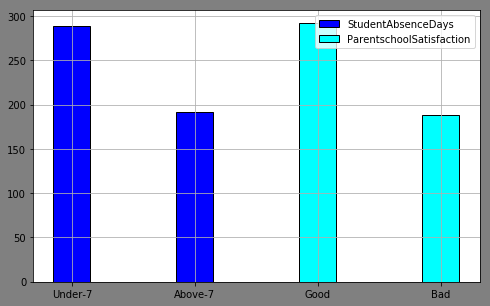

In [44]:
plt.figure(facecolor='gray',figsize=(8,5))
# plt.figure(figsize =(10,5))
plt.bar(absence_d['StudentAbsenceDays'],absence_d['No_of_student'],width=0.3,color='blue',edgecolor='black',capsize=7,label='StudentAbsenceDays')
plt.bar(absence_d['ParentschoolSatisfaction'],absence_d['student'],width=0.3,color='cyan',edgecolor='black',label='ParentschoolSatisfaction')
# plt.xticks([r+0.3 for r in range(len(absence_d.student))])
plt.legend()
plt.grid()
plt.show()